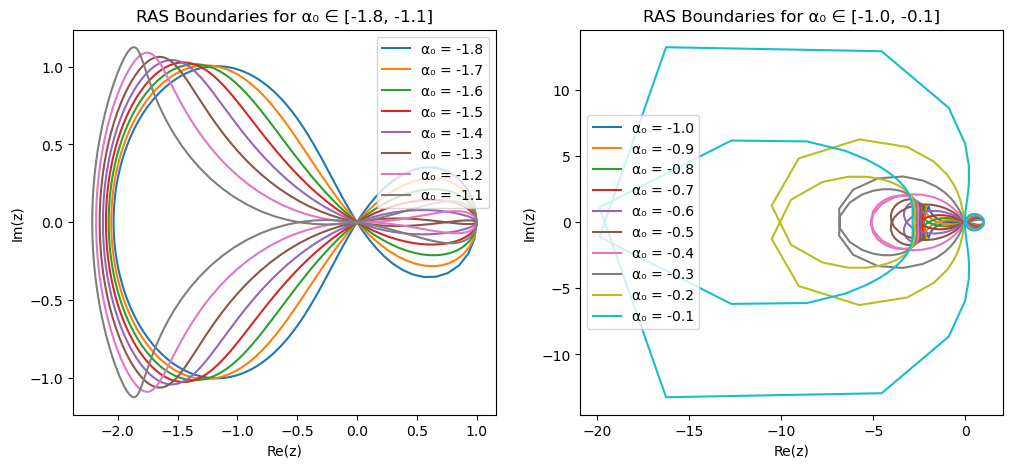

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_boundary_locus(alpha0, num_points=200):
    """Computes the boundary locus for a given alpha0."""
    theta = np.linspace(0, 2*np.pi, num_points)
    z = np.exp(1j * theta)  # Unit circle in the complex plane

    # Characteristic equation of the two-step method
    G = (1 + alpha0 * z + z**2) / (beta_m1 * z + beta_0 + beta_1 / z)
    
    return G

# Define the range of alpha0 values
alpha_values_1 = np.linspace(-1.8, -1.1, 8)
alpha_values_2 = np.linspace(-1.0, -0.1, 10)

# Set fixed beta coefficients (from third-order conditions)
def compute_beta(alpha0):
    beta_m1 = (4/3 + alpha0/6 - (2 + alpha0/2)/2) * 2
    beta_0 = 2 + alpha0/2 - 2 * beta_m1
    beta_1 = 2 + alpha0 - beta_m1 - beta_0
    return beta_m1, beta_0, beta_1

# Plot the boundaries for each set of alpha0 values
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for alpha0 in alpha_values_1:
    beta_m1, beta_0, beta_1 = compute_beta(alpha0)
    G = compute_boundary_locus(alpha0)
    ax[0].plot(G.real, G.imag, label=f"α₀ = {alpha0:.1f}")

for alpha0 in alpha_values_2:
    beta_m1, beta_0, beta_1 = compute_beta(alpha0)
    G = compute_boundary_locus(alpha0)
    ax[1].plot(G.real, G.imag, label=f"α₀ = {alpha0:.1f}")

# Formatting plots
ax[0].set_title("RAS Boundaries for α₀ ∈ [-1.8, -1.1]")
ax[0].set_xlabel("Re(z)")
ax[0].set_ylabel("Im(z)")
ax[0].legend()

ax[1].set_title("RAS Boundaries for α₀ ∈ [-1.0, -0.1]")
ax[1].set_xlabel("Re(z)")
ax[1].set_ylabel("Im(z)")
ax[1].legend()

plt.show()


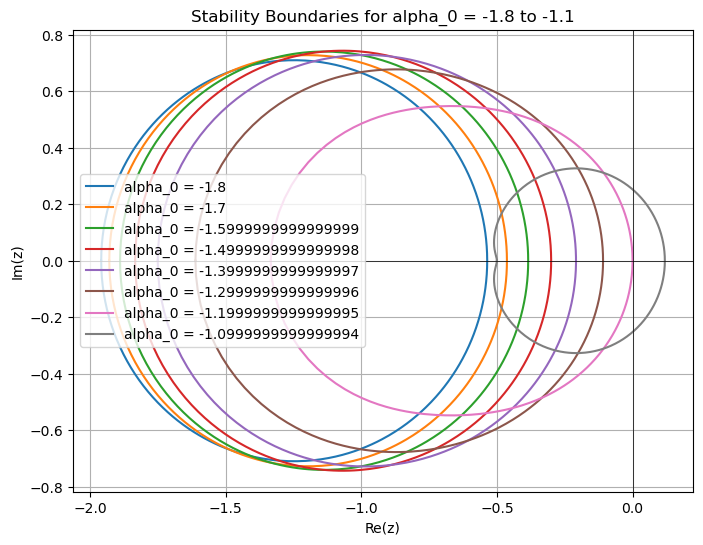

/var/folders/8h/3f67brv57394lw2cy4zl861c0000gn/T/ipykernel_86693/1375370665.py:18: RuntimeWarning: divide by zero encountered in divide
  R = (beta_neg1 * z**2 + beta_0 * z + beta_1) / (z**2 + alpha_0 * z + alpha_1)
/var/folders/8h/3f67brv57394lw2cy4zl861c0000gn/T/ipykernel_86693/1375370665.py:18: RuntimeWarning: invalid value encountered in divide
  R = (beta_neg1 * z**2 + beta_0 * z + beta_1) / (z**2 + alpha_0 * z + alpha_1)


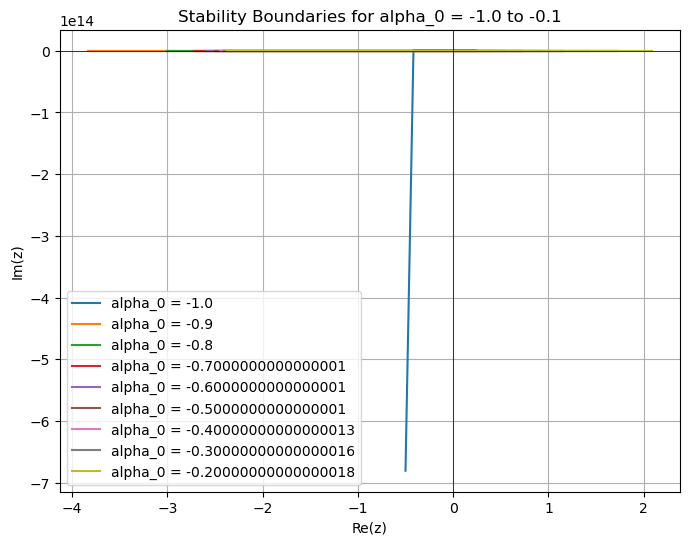

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def stability_region(alpha_0, theta_range):
    """
    Compute the boundary of the region of absolute stability.
    """
    theta = np.linspace(0, 2 * np.pi, theta_range)
    z = np.exp(1j * theta) - 1
    
    # Compute characteristic equation coefficients
    alpha_1 = - (1 + alpha_0)
    beta_neg1 = (2 + alpha_0) / 2
    beta_0 = (4/3 + alpha_0/6 - 2*beta_neg1) * 2
    beta_1 = 2 + alpha_0 - beta_neg1 - beta_0
    
    # Stability function
    R = (beta_neg1 * z**2 + beta_0 * z + beta_1) / (z**2 + alpha_0 * z + alpha_1)
    
    return R

def plot_stability_regions(alpha_values, title):
    """
    Plot stability boundaries for different alpha_0 values.
    """
    plt.figure(figsize=(8, 6))
    for alpha_0 in alpha_values:
        R = stability_region(alpha_0, 500)
        plt.plot(R.real, R.imag, label=f"alpha_0 = {alpha_0}")
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Define alpha_0 values for two separate plots
alpha_values_1 = np.arange(-1.8, -1.0, 0.1)
alpha_values_2 = np.arange(-1.0, -0.1, 0.1)

# Generate plots
plot_stability_regions(alpha_values_1, "Stability Boundaries for alpha_0 = -1.8 to -1.1")
plot_stability_regions(alpha_values_2, "Stability Boundaries for alpha_0 = -1.0 to -0.1")
